Load required libs and sources:

In [1]:
library(readr)
library(ggplot2)

source('leaveOneOut.R')

Load residuals back in R:

In [2]:
resid <- read_csv('DataPart5_resid.csv', col_types = cols(
  resid = col_double()
))

In [3]:
x <- resid$resid
lags <-  c(1,2,3,4)
nBoot <- 30

The LDF-algorithm from ldf.R:

In [4]:
## The result is kept in val
val <- vector()
##
for(i in 1:length(lags))
{
  ## Take the k
  k <- lags[i]
  ## Dataframe for modelling: xk is lagged k steps
  D <- data.frame(x=x[-(1:k)],xk=x[-((length(x)-k+1):length(x))])
  ## Leave one out optimization of the bandwidth with loess
  RSSk <- leaveOneOut(D, FALSE)
  ## Calculate the ldf
  RSS <- sum((D$x - mean(D$x))^2)
  val[i] <- (RSS - RSSk) / RSS
}      

## Very simple bootstrapping
iidVal <- vector()
for(i in 1:nBoot)
{
  ## Bootstrapping to make a confidence band
  xr <- sample(x, min(length(x),100) ,replace=TRUE)
  ## Dataframe for modelling
  DR <- data.frame(x=xr[-1],xk=xr[-length(xr)])
  RSSk <- leaveOneOut(DR)
  ## The ldf is then calculated
  RSS <- sum((DR$x - mean(DR$x))^2)
  (iidVal[i] <- (RSS - RSSk) / RSS)
}

[1] "  Fitting for bandwidth 1 of 12"
[1] "  Fitting for bandwidth 2 of 12"
[1] "  Fitting for bandwidth 3 of 12"
[1] "  Fitting for bandwidth 4 of 12"
[1] "  Fitting for bandwidth 5 of 12"
[1] "  Fitting for bandwidth 6 of 12"
[1] "  Fitting for bandwidth 7 of 12"
[1] "  Fitting for bandwidth 8 of 12"
[1] "  Fitting for bandwidth 9 of 12"
[1] "  Fitting for bandwidth 10 of 12"
[1] "  Fitting for bandwidth 11 of 12"
[1] "  Fitting for bandwidth 12 of 12"
[1] "  Fitting for bandwidth 1 of 12"
[1] "  Fitting for bandwidth 2 of 12"
[1] "  Fitting for bandwidth 3 of 12"
[1] "  Fitting for bandwidth 4 of 12"
[1] "  Fitting for bandwidth 5 of 12"
[1] "  Fitting for bandwidth 6 of 12"
[1] "  Fitting for bandwidth 7 of 12"
[1] "  Fitting for bandwidth 8 of 12"
[1] "  Fitting for bandwidth 9 of 12"
[1] "  Fitting for bandwidth 10 of 12"
[1] "  Fitting for bandwidth 11 of 12"
[1] "  Fitting for bandwidth 12 of 12"
[1] "  Fitting for bandwidth 1 of 12"
[1] "  Fitting for bandwidth 2 of 12"
[1] " 

Do you find any significant non-linearities?

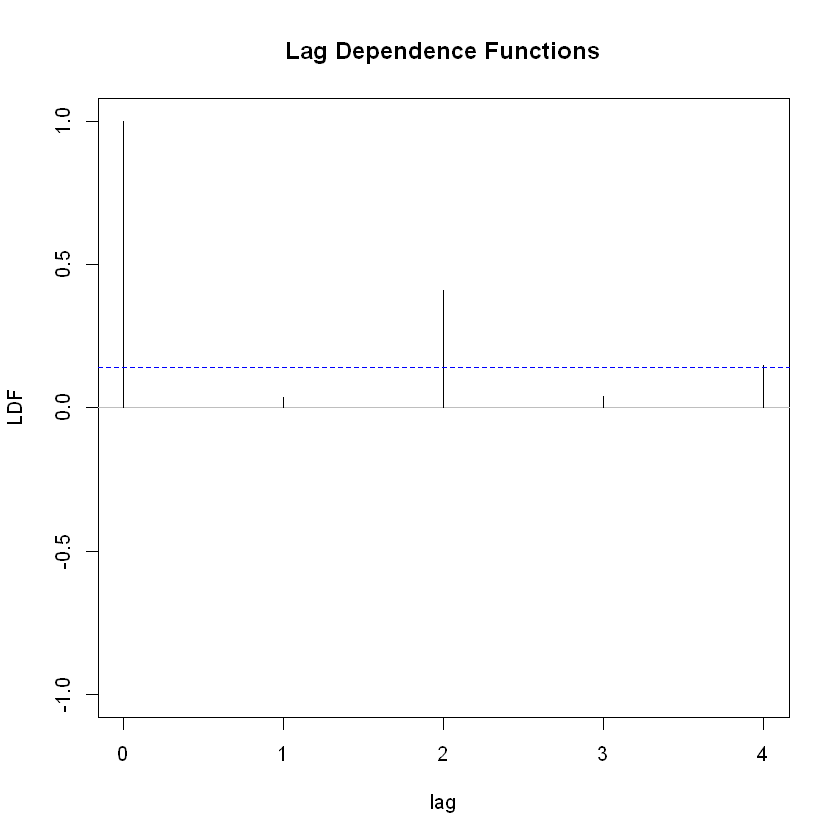

In [5]:
lags <-  c(1,2,3,4)
plot(c(0,lags), c(1,val), type="n", ylim=c(-1,1), ylab="LDF", main="Lag Dependence Functions", xaxt="n", xlab="lag")
axis(1,c(0,lags))
abline(0,0,col="gray")
lines(c(0,lags), c(1,val), type="h")
## Draw the approximate 95% confidence interval
abline(h=quantile(iidVal,0.95), col="blue", lty=2)

Yes, as seen from above plot, yes we do indeed see significant non-linear lag dependencies for lag 2 and 4.

For a better model structure we propose a structure capable of campuring the non linearities, e.g. SETAR. Unfortunately it has not been possible to estimate number of regimes, lags, etc. for a SETAR-model on the data yet.